# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [29]:
from typing import Tuple
import numpy as np
from sklearn import datasets

from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import torch
from torchvision import transforms
from torchvision.datasets import MNIST

sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF3300", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где 
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

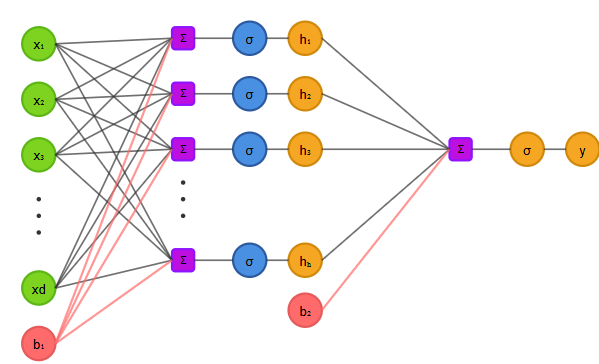

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.

$s = \sigma_1 (W_1^T x + b_1)$, $z = W_2^T x + b_2$, $y = \sigma_2 (W_2^T s + b_2)$ (y - также выходной параметр)

Необходимые производные (сразу вычислим их, опираясь на фукнцию кросс-энтропии):

Второй слой:
$$
\frac{\partial L}{\partial y}
= -\frac{Y}{y} + \frac{1-Y}{1-y} = \frac{y-Y}{y(1-y)}
$$

$$
\frac{\partial y}{\partial z} = y(1-y)
$$

$$
\frac{\partial L}{\partial z}
= \frac{\partial L}{\partial y}*\frac{\partial y}{\partial z}
= y - Y
$$

$$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial z} * \frac{\partial z}{\partial W_2} = (y - Y)s
$$

$$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial z} * \frac{\partial z}{\partial b_2} = y - Y
$$

Первый слой:

$$
\frac{\partial L}{\partial s} = \frac{\partial L}{\partial z} * \frac{\partial z}{\partial s} = (y - Y)*W_2
$$

$$
\frac{\partial s}{\partial x} = 1 - \tanh^2(x) = 1 - s^2
$$


$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial s} * (1 - s^2) = (y - Y)*(1 - s^2)*W_2
= 
$$

$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial x} * \frac{\partial x}{\partial W_1} = (y - Y)*(1 - s^2)*W_2*x
$$

$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial x} = (y - Y)*(1 - s^2)*W_2
$$

**3.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.

1. Вычисляем выходное значение прямым проходом

$$
s = \tanh(W_1^{\top}x + b_1), \qquad
z = W_2^{\top}s + b_2, \qquad
y = \sigma(z)=\frac{1}{1+e^{-z}}
$$

А также кросс-энтропию:
$$
\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big)
$$

2. Осуществляем обратный проход для расчета градиентов (сначала считаем второй слой, затем первый). Вычисления производных в пункте выше.


3. Обновляем веса с помощью градиентного спуска

$$
W_2 \leftarrow W_2 - \eta\, \frac{\partial L}{\partial W_2},
\qquad
b_2 \leftarrow b_2 - \eta\, \frac{\partial L}{\partial b_2}
$$

$$
W_1 \leftarrow W_1 - \eta\, \frac{\partial L}{\partial W_1},
\qquad
b_1 \leftarrow b_1 - \eta\, \frac{\partial L}{\partial b_1}
$$

Основные операции, которые мы выполняем - умножение матриц рамерностью $n \times d$, эти операции выполняются некоторое константное число раз (т.к. число операций грандиентного спуска ограничено константной, не зависящей ни от n, ни от d). Тогда сложность - О(n*d), то есть линейна от количества параметров.


**Выводы:**

Благодаря методу обратного распространения ошибки возможно обучать нейросеть с линейной сложностью.

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

- Логит: $z = W_2^T x + b_2$
- Сигмоида: $y = \sigma_2 (W_2^T s + b_2)$
- Бинарная кросс-энтропия: $\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big)$

Считаем, что: $y = \sigma (s)$
Тогда получаем (см задачу 2 п.2):
$$
\frac{\partial L}{\partial z} = \frac{\partial L}{\partial y}*\frac{\partial y}{\partial z} = \sigma (s) - Y
$$

**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch. 
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [16]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации.

    Параметры:
        input_size (int): Размер входного вектора.
        hidden_size (int): Количество нейронов в скрытом слое.
        learning_rate (float, optional): Скорость обучения (по умолчанию 0.01).
        n_epoch (int, optional): Количество эпох обучения (по умолчанию 100).
        weight_init_scale (float, optional): Масштаб для инициализации весов (по умолчанию 1).
    """

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        # Инициализация весов
        self._initialize_weights()

        # Инициализация градиентов
        self._zero_grad()

        # Для хранения истории потерь
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями.

        Параметры:
            rows (int): Количество строк.
            cols (int): Количество столбцов.

        Возвращает:
            np.ndarray: Матрица весов.
        """
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса.

        Параметры:
            x (np.ndarray): Входной массив.

        Возвращает:
            np.ndarray: Производная функции tanh.
        """
        return 1 - np.tanh(x)**2

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду.

        Параметры:
            x (np.ndarray): Входной массив.
            scale (int, optional): Максимальное абсолютное значение для ограничения (по умолчанию 1000).

        Возвращает:
            np.ndarray: Значения сигмоиды.
        """
        x = np.clip(x, -scale, scale)  # Ограничиваем значения
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """Вычисляет значение бинарной кросс-энтропии.

        Параметры:
            y_pred (np.ndarray): Предсказанные значения (вероятности).
            y_true (np.ndarray): Истинные значения (0 или 1).

        Возвращает:
            float: Значение бинарной кросс-энтропии.
        """

        # Вычислите кросс-энтропию
        # Используйте подход с logsumexp (см. ДЗ 3, задача 5)
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) 
        logit = np.log(y_pred / (1 - y_pred))
        loss = y_true * np.logaddexp(0, -logit) + (1 - y_true) * np.logaddexp(0, logit)
        return np.mean(loss)

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды.

        Параметры:
            logits (np.ndarray): Предсказанные значения.
            y (np.ndarray): Истинные значения.

        Возвращает:
            np.ndarray: Градиент по выходу до применения сигмоиды.
        """

        # Вычислите градиент по выходу сети до применения сигмоиды.
        # Спойлер: получится очень простая формула
        return (TwoLayersNNClassifier.sigmoid(logits) - y) / y.shape[0]

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Выход сети (вероятности).
        """
        self.s = np.tanh(X @ self.W1 + self.b1)
        self.z = self.s @ self.W2 + self.b2
        return self.sigmoid(self.z)

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратный проход (backpropagation), накапливает градиенты.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения.
        """

        # Градиент по выходу до применения сигмоиды
        ds2 = self.output_gradient(self.z, y)

        # Градиент по параметрам 2-го слоя
        self.dW2 += self.s.T @ ds2
        self.db2 += np.sum(ds2)

        # Градиент по выходу скрытого слоя
        ds1 = (ds2 @ self.W2.T) * self.tanh_derivative(X @ self.W1 + self.b1)

        # Градиент по параметрам 1-го слоя
        self.dW1 += X.T @ ds1
        self.db1 += np.sum(ds1)

    def _step(self):
        """Обновляет веса сети на основе вычисленных градиентов."""

        # Реализуйте шаг градиентного спуска
        self.W1 -= self.learning_rate*self.dW1
        self.b1 -= self.learning_rate*self.db1
        self.W2 -= self.learning_rate*self.dW2
        self.b2 -= self.learning_rate*self.db2

    def _zero_grad(self):
        """Обнуляет градиенты перед следующим шагом обучения."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения на каждой итерации.

        Параметры:
            epoch (int): Номер текущей эпохи.
            plot_freq (int): Частота отрисовки графика.
        """
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"

        if plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            print(info_text)

        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (0 или 1).
            verbose (bool, optional): Если True, выводит прогресс обучения (по умолчанию True).
            plot_freq (int, optional): Частота отрисовки графика.
                    Если 0, график не рисуется (по умолчанию 0).
        """
        y = y[:, None]
        self.loss_history = []  # Очистка истории потерь перед обучением

        for epoch in range(self.n_epoch):
            # Прямой проход по сети
            y_pred = self._forward(X)
            loss = self.binary_crossentropy(y_pred, y)
            self.loss_history.append(loss)  # Сохраняем значение потерь

            # Допишите шаги обучения
            self._backward(X, y)
            self._step()

            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Предсказанные классы (0 или 1).
        """
        y_pred = self._forward(X)
        return (y_pred > 0.5).astype(int)  # Порог 0.5 для бинарной классификации

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам 0 и 1.

        Параметры:
        X (np.ndarray): Входные данные.

        Возвращает:
        np.ndarray: Матрица вероятностей формы (n, 2), где n — количество объектов.
                   Первый столбец — вероятность класса 0, второй — класса 1.
        """
        prob_class_1 = self._forward(X)  # Вероятность класса 1
        prob_class_0 = 1 - prob_class_1  # Вероятность класса 0
        return np.hstack((prob_class_0, prob_class_1))  # Объединяем в матрицу (n, 2)

**3.** Сгенерируем искусственные данные

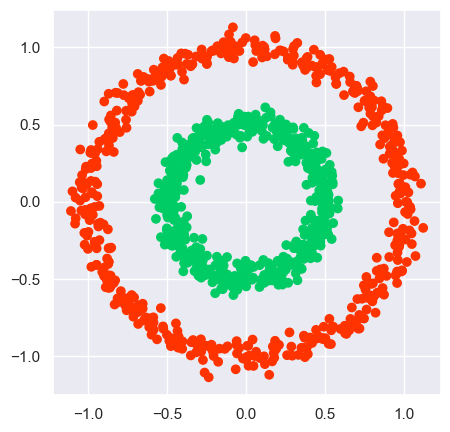

In [4]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

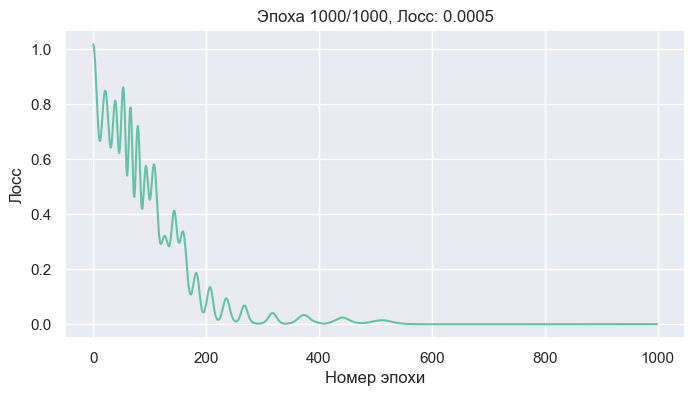

In [17]:
model = TwoLayersNNClassifier(input_size=2, hidden_size=32, n_epoch=1000)
model.fit(X, y, verbose=True, plot_freq=20)

С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу. 

In [22]:
mesh = np.arange(-1.5, 1.5, 0.02)
mesh_x, mesh_y = np.meshgrid(mesh, mesh)
points = np.column_stack((mesh_x.ravel(), mesh_y.ravel()))
probs = model.predict_proba(points)[:,1]
probs

array([3.19467777e-58, 2.96453453e-58, 2.79524724e-58, ...,
       5.60311799e-31, 1.22125757e-31, 5.11638277e-33], shape=(22500,))

Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

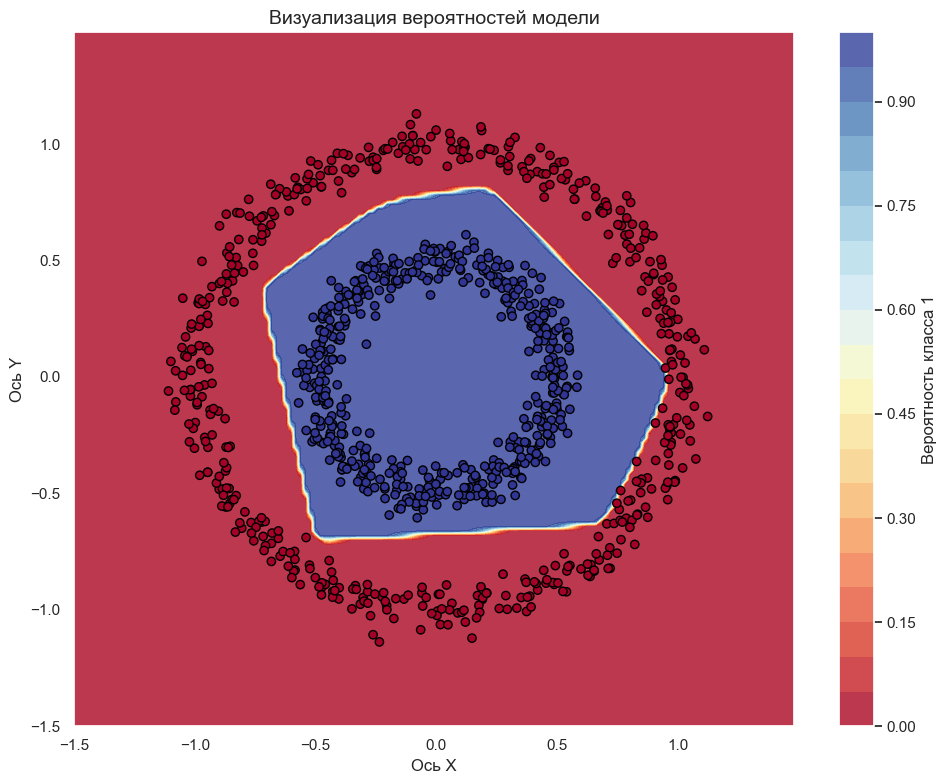

In [24]:
probs_grid = probs.reshape(mesh_x.shape)

plt.figure(figsize=(10, 8))
contour = plt.contourf(mesh_x, mesh_y, probs_grid, 
                      levels=20, cmap='RdYlBu', 
                      alpha=0.8, vmin=0, vmax=1)

cbar = plt.colorbar(contour)
cbar.set_label('Вероятность класса 1', fontsize=12)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdYlBu', edgecolors='k')

plt.title('Визуализация вероятностей модели', fontsize=14)
plt.xlabel('Ось X', fontsize=12)
plt.ylabel('Ось Y', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Немного увеличим разброс данных

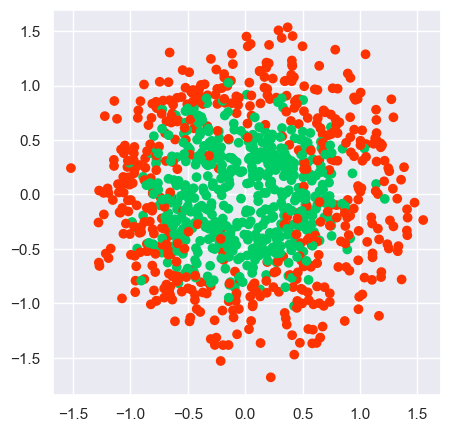

In [25]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

Обучаем модель

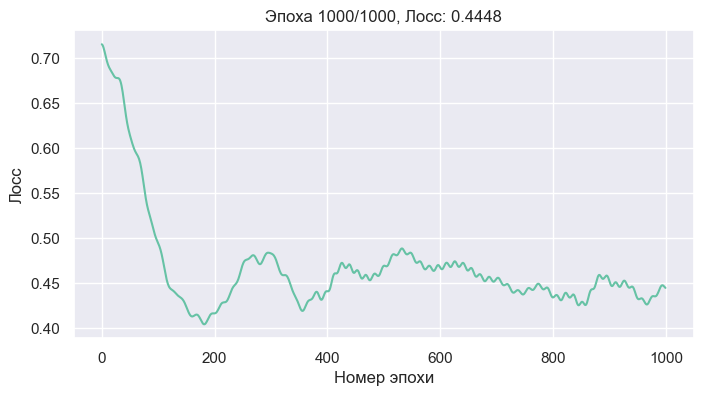

In [26]:
model = TwoLayersNNClassifier(input_size=2, hidden_size=32, n_epoch=1000)
model.fit(X, y, verbose=True, plot_freq=20)

Создаем сетку и считаем вероятности классов на ней

In [27]:
mesh = np.arange(-1.5, 1.5, 0.02)
mesh_x, mesh_y = np.meshgrid(mesh, mesh)
points = np.column_stack((mesh_x.ravel(), mesh_y.ravel()))
probs = model.predict_proba(points)[:,1]
probs

array([9.64979902e-25, 1.04509415e-24, 1.13170226e-24, ...,
       1.16564556e-08, 1.39410878e-08, 1.69086115e-08], shape=(22500,))

Визуализируем

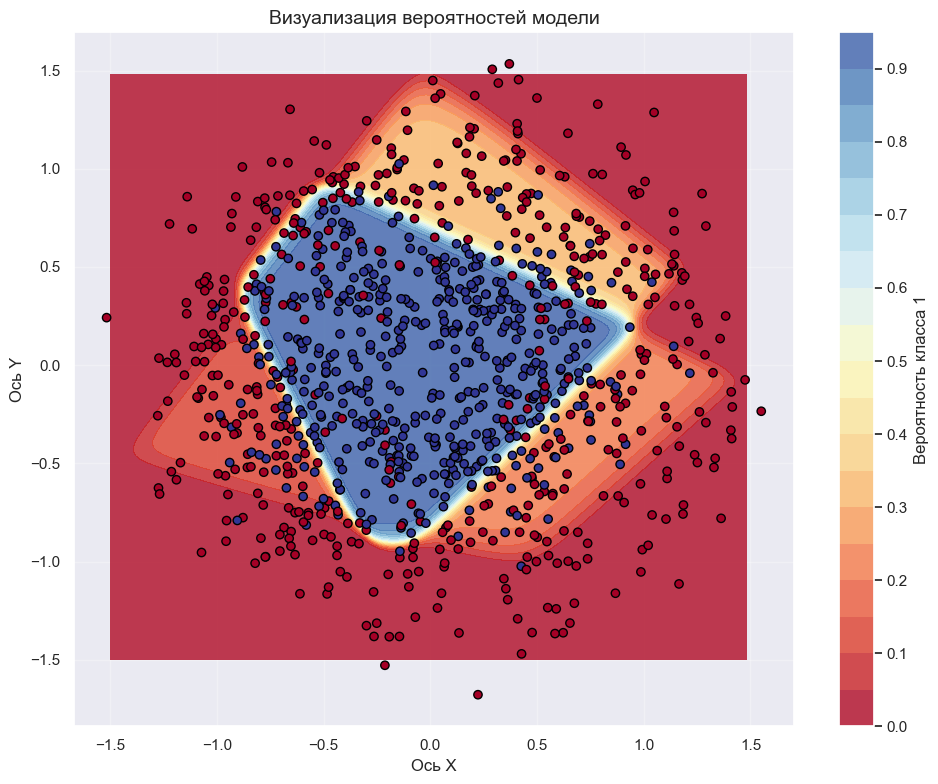

In [28]:
probs_grid = probs.reshape(mesh_x.shape)

plt.figure(figsize=(10, 8))
contour = plt.contourf(mesh_x, mesh_y, probs_grid, 
                      levels=20, cmap='RdYlBu', 
                      alpha=0.8, vmin=0, vmax=1)

cbar = plt.colorbar(contour)
cbar.set_label('Вероятность класса 1', fontsize=12)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdYlBu', edgecolors='k')

plt.title('Визуализация вероятностей модели', fontsize=14)
plt.xlabel('Ось X', fontsize=12)
plt.ylabel('Ось Y', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы:**

...

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [37]:
def load_mnist(
    train_size: int = 6000, target_size: int = 28
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """Загружает и подготавливает данные MNIST для обучения и тестирования.

    Параметры:
    train_size (int): Количество обучаемых данных. По умолчанию 6000.
    target_size (int): Размер, до которого уменьшаются изображения. По умолчанию 14.

    Возвращает:
    train_images (torch.Tensor): Тензор с изображениями для обучения.
    train_labels (torch.Tensor): Тензор с метками для обучения.
    test_images (torch.Tensor): Тензор с изображениями для тестирования.
    test_labels (torch.Tensor): Тензор с метками для тестирования.

    Данные загружаются из набора MNIST, нормализуются, уменьшаются в
    размере и преобразуются в векторы. Для обучения используется только
    часть (train_fraction) от исходного набора данных.
    """

    PIXEL_MAX_VALUE = 255.0  # Для нормализации значений пикселей

    # Создаем преобразование для данных: конвертируем изображения в тензоры PyTorch
    transform = transforms.Compose(
        [
            # Преобразует изображение в тензор и нормализует значения в диапазоне [0, 1]
            transforms.ToTensor(),
        ]
    )

    # Загружаем обучающий и тестовый наборы данных MNIST
    train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = MNIST(root="./data", train=False, transform=transform, download=True)

    # Выбираем часть обучающего набора данных
    train_indices = np.random.choice(len(train_dataset), train_size, replace=False)

    # Преобразуем изображения в тензоры и нормализуем их, деля на PIXEL_MAX_VALUE
    train_images = train_dataset.data[train_indices].unsqueeze(1).float() / PIXEL_MAX_VALUE
    test_images = test_dataset.data.unsqueeze(1).float() / PIXEL_MAX_VALUE

    # Уменьшаем размер изображений до target_size x target_size с использованием билинейной интерполяции
    train_images = torch.nn.functional.interpolate(
        train_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )
    test_images = torch.nn.functional.interpolate(
        test_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )

    # Преобразуем изображения в векторы (разворачиваем в одномерные массивы)
    train_images = train_images.view(train_size, -1)
    test_images = test_images.view(len(test_dataset), -1)

    # Получаем метки для выбранных обучающих и всех тестовых данных
    train_labels = train_dataset.targets[train_indices]
    test_labels = test_dataset.targets

    return train_images, train_labels, test_images, test_labels

Загрузим данные и преобразуем к нужному формату

In [38]:
train_images, train_labels, test_images, test_labels = load_mnist()

train_filter = (train_labels == 0) | (train_labels == 1)
train_images = train_images[train_filter]
train_labels = train_labels[train_filter]

test_filter = (test_labels == 0) | (test_labels == 1)
test_images = test_images[test_filter]
test_labels = test_labels[test_filter]

X_train_0, y_train_0 = train_images[train_labels == 0][:1000], train_labels[train_labels == 0][:1000]
X_train_1, y_train_1 = train_images[train_labels == 1][:1000], train_labels[train_labels == 1][:1000]

train_images = np.concatenate([X_train_0, X_train_1], axis=0)
train_labels = np.concatenate([y_train_0, y_train_1], axis=0)

X_test_0, y_test_0 = test_images[test_labels == 0][:500], test_labels[test_labels == 0][:500]
X_test_1, y_test_1 = test_images[test_labels == 1][:500], test_labels[test_labels == 1][:500]

test_images = np.concatenate([X_test_0, X_test_1], axis=0)
test_labels = np.concatenate([y_test_0, y_test_1], axis=0)

train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

Обучите реализованную ранее нейронную сеть к этим данным.


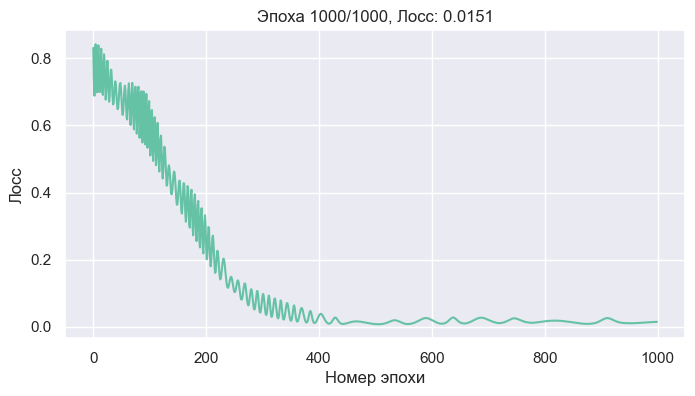

In [40]:
model_mnist = TwoLayersNNClassifier(input_size=28*28, hidden_size=14*14, n_epoch=1000, learning_rate =0.01)
model_mnist.fit(train_images, train_labels, verbose=True, plot_freq=10)

Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [46]:
y_pred = model_mnist.predict(test_images).reshape(-1)
accuracy = (y_pred == test_labels)
print(f'Точность модели: {np.mean(accuracy)*100}%')

Точность модели: 99.5%


**Выводы:**

...

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

Запишем градиент для первого слоя:
$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial h_{99}} \cdot \frac{\partial h_{99}}{\partial h_{98}} \cdots \frac{\partial h_2}{\partial h_1} \cdot \frac{\partial h_1}{\partial W_1}
$$

Посчитаем производные:
$$
\frac{\partial L}{\partial h_{99}} = y - Y
$$

$$
\frac{\partial h_{i+1}}{\partial h_i} = W_{i+1} * \frac{\partial (\tanh h_i)}{\partial h_i} = W_{i+1}^T*diag (1 - (\tanh h_i)^2)
$$

$$
\frac{\partial h_1}{\partial W_1} = x^T
$$

Тогда суммируя получим:
$$
\frac{\partial \mathcal{L}}{\partial W_1} = (y - Y) \cdot \left( \prod_{i=99}^{2} W_{i+1}^\top \cdot \text{diag}\left(1 - \tanh^2(h_i)\right) \right) \cdot \text{diag}\left(1 - \tanh^2(h_1)\right) \cdot x^\top
$$

Сложность: 

Нарисуйте график функции активации и ее производной.

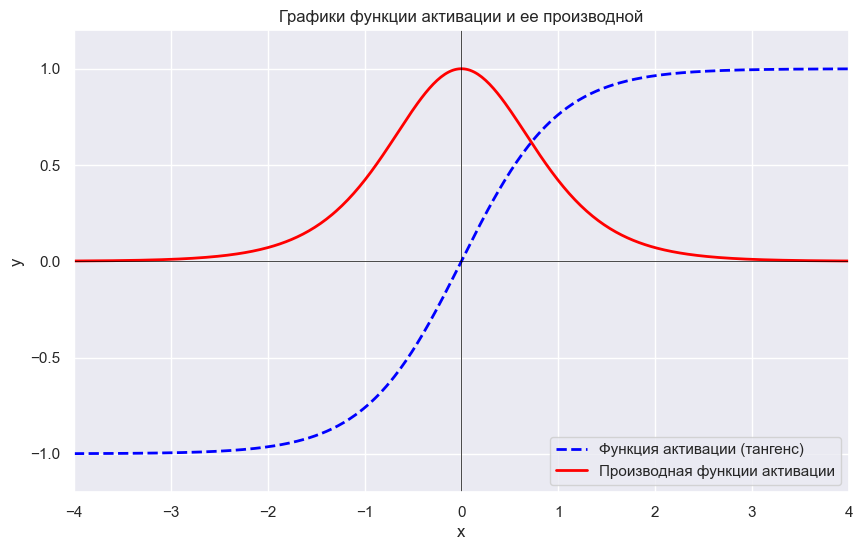

In [52]:
x = np.linspace(-4, 4, 400)

tanh_x = np.tanh(x)
derivative_tanh = 1 - tanh_x**2

plt.figure(figsize=(10, 6))
plt.title("Графики функции активации и ее производной")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)

plt.plot(x, tanh_x, 'b--', linewidth=2, label='Функция активации (тангенс)')
plt.plot(x, derivative_tanh, 'r-', linewidth=2, label='Производная функции активации')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='lower right')

plt.show()

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

Видно, что на значениях, по модулю превышающих 2, функция производной становится пологой. Градиент по весам первого слоя зависит от произведения производных, поэтому при достаточно больших значениях на промежуточных слоях мы будем получать маленький градиент, особенно при обратном движении (через back propagation). Тогда может случиться так, что модель не сможет "шагать" ни при каких learning rate.

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import accuracy_score

class NinetyNineLayersNNClassifier(nn.Module):  
    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
        n_hidden_layers: int = 99,
    ):
        super().__init__()
        
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale
        self.n_hidden_layers = n_hidden_layers
        
        self._build_network()
        
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        self.criterion = nn.BCEWithLogitsLoss()
        
        # История ошибок
        self.loss_history = []
    
    def _build_network(self):
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(self.input_size, self.hidden_size))
        self.layers.append(nn.Tanh())
        
        for _ in range(self.n_hidden_layers - 1):
            self.layers.append(nn.Linear(self.hidden_size, self.hidden_size))
            self.layers.append(nn.Tanh())
        
        self.output_layer = nn.Linear(self.hidden_size, 1)

        self._initialize_weights()
    
    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                layer.weight.data = (torch.rand(layer.weight.shape) * 2 - 1) * self.weight_init_scale
                layer.bias.data = (torch.rand(layer.bias.shape) * 2 - 1) * self.weight_init_scale
        
        self.output_layer.weight.data = (torch.rand(self.output_layer.weight.shape) * 2 - 1) * self.weight_init_scale
        self.output_layer.bias.data = (torch.rand(self.output_layer.bias.shape) * 2 - 1) * self.weight_init_scale
    
    def forward(self, x):
        if isinstance(x, np.ndarray):
            x = torch.FloatTensor(x)
            
        for layer in self.layers:
            x = layer(x)
        
        x = self.output_layer(x)
        return x
    
    def fit(self, X, y, verbose=True, plot_freq=0):
        if isinstance(X, np.ndarray):
            X = torch.FloatTensor(X)
        if isinstance(y, np.ndarray):
            y = torch.FloatTensor(y).view(-1, 1)
        
        self.loss_history = []
        
        for epoch in range(self.n_epoch):
            self.optimizer.zero_grad()
            
            logits = self.forward(X)
            loss = self.criterion(logits, y)
            
            loss.backward()
            self.optimizer.step()
            
            self.loss_history.append(loss.item())
            
            if verbose:
                self._show_progress(epoch, plot_freq)
    
    def predict_proba(self, X):
        self.eval()
        with torch.no_grad():
            if isinstance(X, np.ndarray):
                X = torch.FloatTensor(X)
            logits = self.forward(X)
            probs = torch.sigmoid(logits)
            return probs.numpy().flatten()
    
    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs > 0.5).astype(int)
    
    def _show_progress(self, epoch, plot_freq):
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"
        
        if plot_freq == 0:
            clear_output(wait=True)
            print(info_text)
        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Эпоха")
            plt.ylabel("Loss")
            plt.title(info_text)
            plt.show()

Аналогично задаче 3 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 32 на каждом шаге обучения.

In [70]:
train_images, train_labels, test_images, test_labels = load_mnist()

train_filter = (train_labels == 0) | (train_labels == 1)
train_images = train_images[train_filter]
train_labels = train_labels[train_filter]

test_filter = (test_labels == 0) | (test_labels == 1)
test_images = test_images[test_filter]
test_labels = test_labels[test_filter]

train_images = train_images.numpy().astype(np.float32) / 255.0
test_images  = test_images.numpy().astype(np.float32) / 255.0

train_images = train_images.reshape(len(train_images), -1)
test_images  = test_images.reshape(len(test_images), -1)

train_labels = train_labels.float().view(-1, 1)
test_labels  = test_labels.float().view(-1, 1)

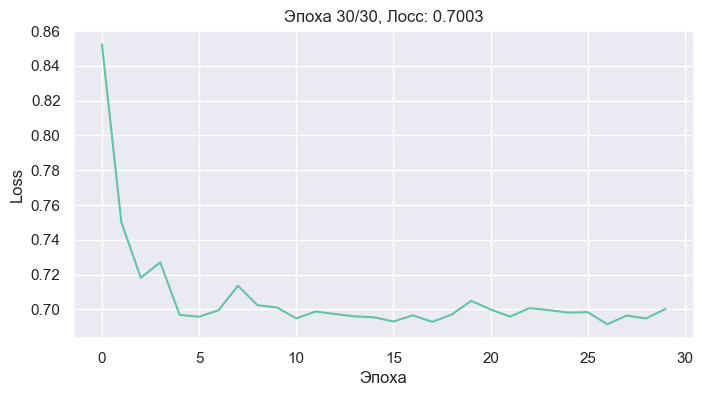

In [75]:
batch_size = 32
n_epochs = 30

model_mnist99 = NinetyNineLayersNNClassifier(input_size=784, hidden_size=32, n_hidden_layers=99, n_epoch=n_epochs)

N = train_images.shape[0]

for epoch in range(n_epochs):
    epoch_loss = 0.0
    batch_count = 0
    
    indices = np.random.permutation(N)
    train_images_shuffled = train_images[indices]
    train_labels_shuffled = train_labels[indices]
    
    for start in range(0, N, batch_size):
        end = start + batch_size
        X_batch = torch.tensor(train_images_shuffled[start:end], dtype=torch.float32)
        y_batch = torch.tensor(train_labels_shuffled[start:end], dtype=torch.float32)

        model_mnist99.optimizer.zero_grad()
        logits = model_mnist99(X_batch)
        loss = model_mnist99.criterion(logits, y_batch)
        loss.backward()
        model_mnist99.optimizer.step()
        
        epoch_loss += loss.item()
        batch_count += 1
    
    model_mnist99.loss_history.append(epoch_loss / batch_count)
    model_mnist99._show_progress(epoch, 1)

Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

In [65]:
print(type(train_labels), train_labels.shape, train_labels.dtype)


<class 'numpy.ndarray'> (1291,) int64


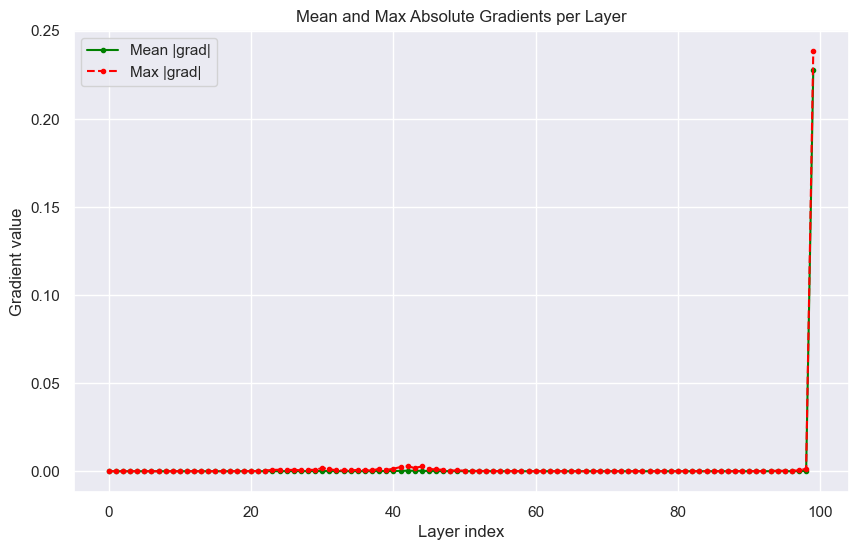

In [81]:
forward = model_mnist99(train_images)
losses = model_mnist99.criterion(forward, train_labels)
losses.backward()

mean_grads = []
max_grads = []

for name, param in model_mnist99.named_parameters():
    if "weight" in name and param.grad is not None:
        grad = param.grad.detach().abs()
        mean_grads.append(grad.mean().item())
        max_grads.append(grad.max().item())

plt.figure(figsize=(10, 6))  
plt.plot(range(len(mean_grads)), mean_grads, 'g-o', label="Mean |grad|", markersize=3)
plt.plot(range(len(max_grads)), max_grads, 'r--o', label="Max |grad|", markersize=3)
plt.xlabel("Layer index")
plt.ylabel("Gradient value")
plt.legend()
plt.title("Mean and Max Absolute Gradients per Layer")
plt.show()

**Выводы:**

...

*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 3 курсе.